In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [33]:
x_train = pd.read_csv("../../human_train.csv").drop(["Activity","subject"],axis=1)
x_test = pd.read_csv("../../human_train.csv",usecols=["Activity"])
y_train = pd.read_csv("../../human_test.csv").drop(["Activity","subject"],axis=1)
y_test = pd.read_csv("../../human_test.csv",usecols=["Activity"])

In [34]:
x_train.shape , y_train.shape

((7352, 561), (2947, 561))

In [35]:
le = LabelEncoder()
x_test["Activity"] = le.fit_transform(x_test)
y_test = le.fit_transform(y_test)

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

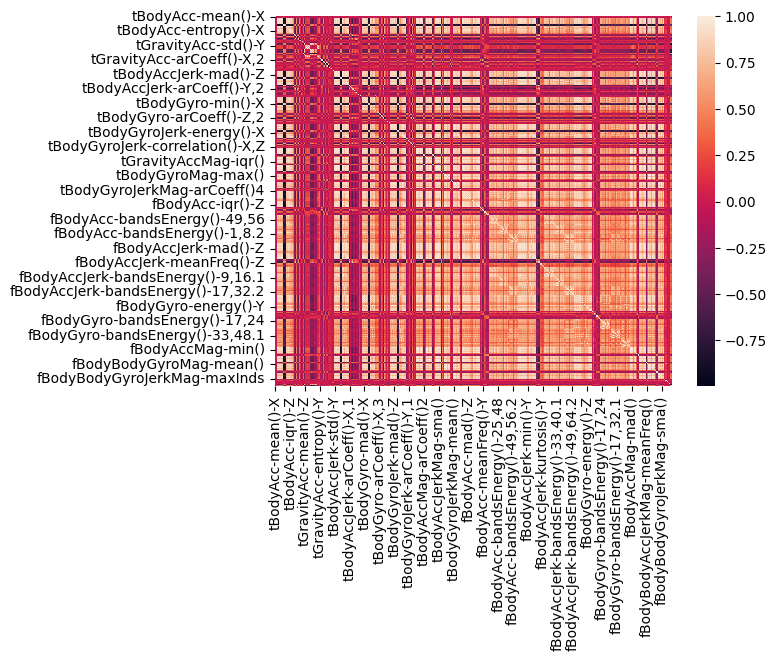

In [36]:
sns.heatmap(x_train.corr())

In [37]:
corr_matrix= x_train.corr()

In [38]:
# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

2183


In [39]:
columns_to_drop = set(columns_to_drop)
len(columns_to_drop)

292

In [40]:
x_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
y_train.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [42]:
x_train.shape , y_train.shape

((7352, 269), (2947, 269))